Analyzing Which regression model best fits for CIBIL score prdeiction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error , root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!gdown 13Y-3G3IiP3JrkqOPrz-LQGC6jHsvvdfx

Downloading...
From: https://drive.google.com/uc?id=13Y-3G3IiP3JrkqOPrz-LQGC6jHsvvdfx
To: /content/credit_score.csv
100% 475k/475k [00:00<00:00, 81.6MB/s]


In [ ]:
data = pd.read_csv('credit_score.csv')

unwanted_columns = ['CUST_ID', 'DEFAULT']
data = data.drop(columns=unwanted_columns)


In [ ]:
data.head()


,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,1.0000,0.0000,0.0625,High,1,0,0,0,0,444
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.9091,0.7692,0.2222,No,1,0,0,1,0,625
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.0000,1.4286,0.0578,High,1,0,0,1,0,469
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.0000,1.2500,0.1282,High,1,0,0,1,0,559
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.9091,0.1163,0.0568,High,1,1,1,1,1,473


In [ ]:
X = data.drop(['CREDIT_SCORE'], axis=1)
y = data['CREDIT_SCORE']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_features = X_train.select_dtypes(include=['object']).columns

encoder = LabelEncoder()

for feature in categorical_features:
    X_train[feature] = encoder.fit_transform(X_train[feature])
    X_test[feature] = encoder.transform(X_test[feature]) # Use the same encoder for X_test


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Linear Regression


Linear Regression -
 MAE: 21.629
 MSE: 891.247
 RMSE: 29.854
 R²: 0.775


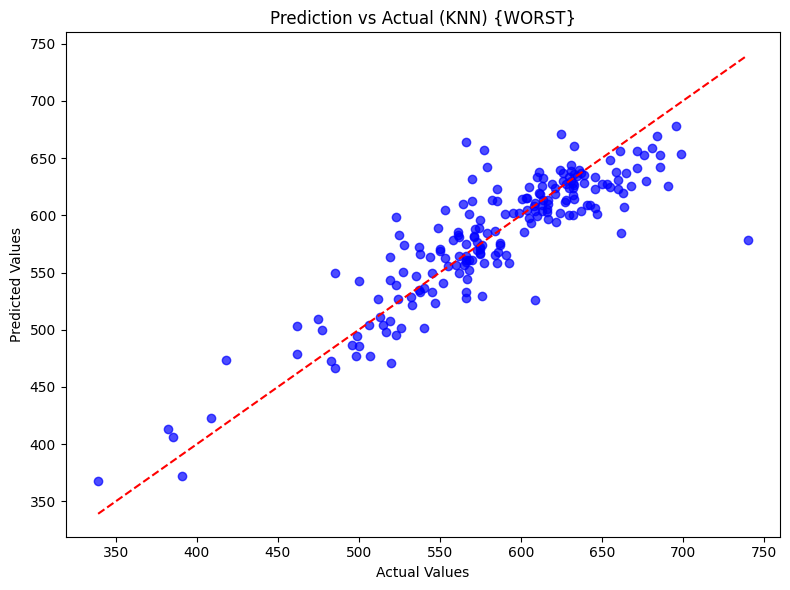

In [ ]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


y_pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Prediction vs Actual (LR)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()


print(f"Linear Regression -\n MAE: {mae_lr:.3f}\n MSE: {mse_lr:.3f}\n RMSE: {rmse_lr:.3f}\n R²: {r2_lr:.3f}")



Decision Tree Regression


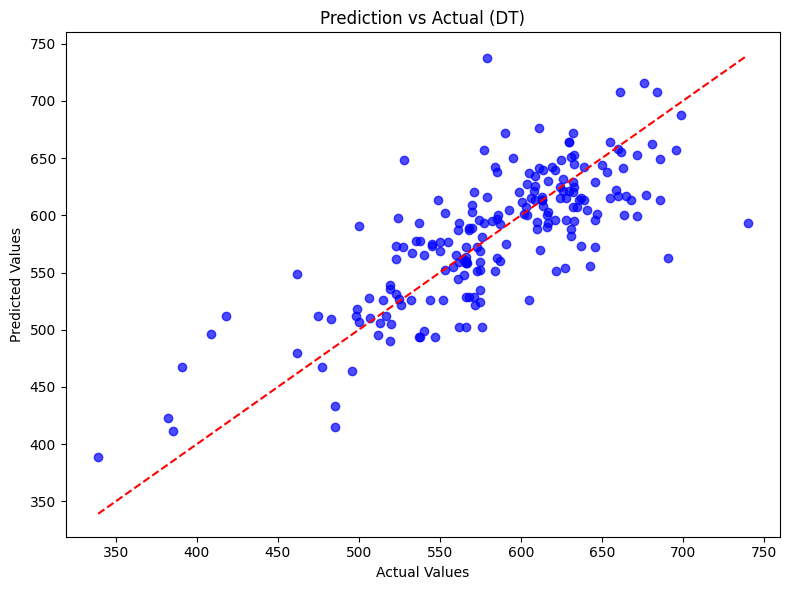

Decision Tree Regression -
 MAE: 31.480
 MSE: 1722.500
 RMSE: 41.503
 R²: 0.566


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt.predict(X_test_scaled)

# Metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Prediction vs Actual (DT)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

print(f"Decision Tree Regression -\n MAE: {mae_dt:.3f}\n MSE: {mse_dt:.3f}\n RMSE: {rmse_dt:.3f}\n R²: {r2_dt:.3f}")




Random Forest Regression


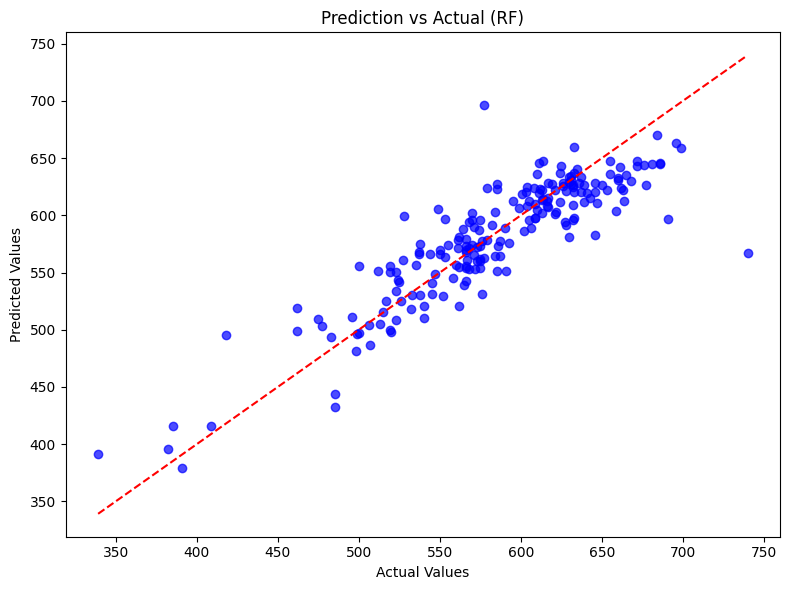

Random Forest Regression -
 MAE: 21.718
 MSE: 895.579
 RMSE: 29.926
 R²: 0.774


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_scaled)

# Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Prediction vs Actual (RF)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()


print(f"Random Forest Regression -\n MAE: {mae_rf:.3f}\n MSE: {mse_rf:.3f}\n RMSE: {rmse_rf:.3f}\n R²: {r2_rf:.3f}")


KNN

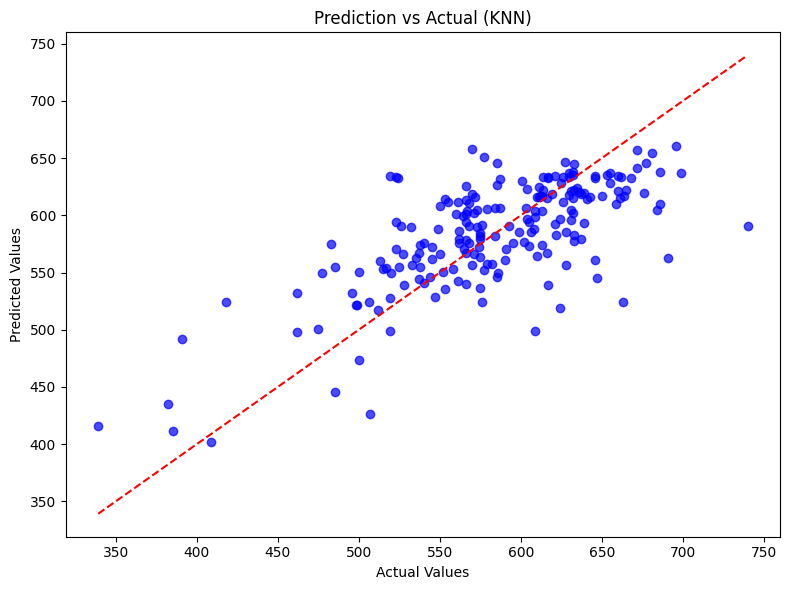

KNN Regression -
 MAE: 34.100
 MSE: 1977.266
 RMSE: 44.466
 R²: 0.502


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Model
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Prediction vs Actual (KNN)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()


print(f"KNN Regression -\n MAE: {mae_knn:.3f}\n MSE: {mse_knn:.3f}\n RMSE: {rmse_knn:.3f}\n R²: {r2_knn:.3f}")


BOOSTING (Gradient boosting regressor)

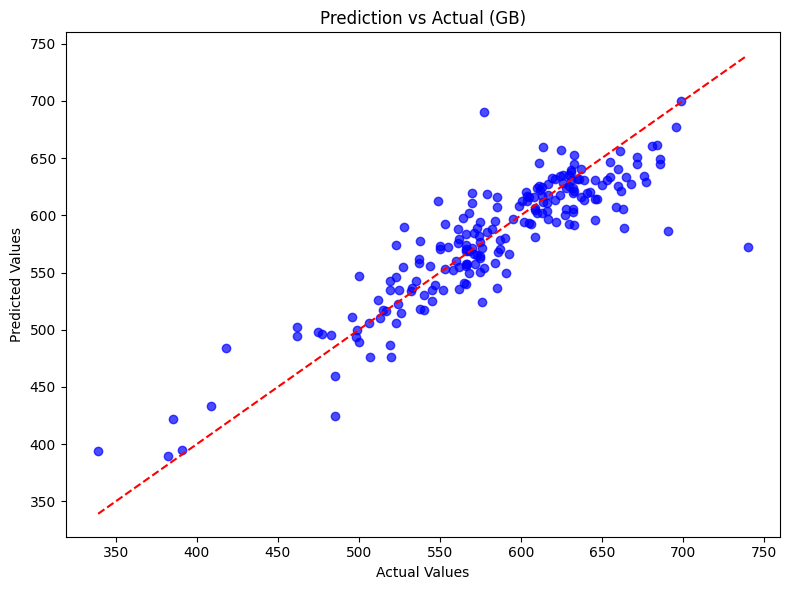

Gradient Boosting Regression -
 MAE: 21.174
 MSE: 870.609
 RMSE: 29.506
 R²: 0.781


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)

# Predictions
y_pred_gb = gb.predict(X_test_scaled)

# Metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Prediction vs Actual (GB)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()


print(f"Gradient Boosting Regression -\n MAE: {mae_gb:.3f}\n MSE: {mse_gb:.3f}\n RMSE: {rmse_gb:.3f}\n R²: {r2_gb:.3f}")


In [ ]:
# ADA BOOST regressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

mae_ada = mean_absolute_error(y_test, y_pred_ada)
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print(f"AdaBoost -\n MAE: {mae_ada:.3f}\n MSE: {mse_ada:.3f}\n RMSE: {rmse_ada:.3f}\n R²: {r2_ada:.3f}\n")

# XGBOOST Regressor
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost -\n MAE: {mae_xgb:.3f}\n MSE: {mse_xgb:.3f}\n RMSE: {rmse_xgb:.3f}\n R²: {r2_xgb:.3f}\n")

# LightGBM Regressor
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM -\n MAE: {mae_lgb:.3f}\n MSE: {mse_lgb:.3f}\n RMSE: {rmse_lgb:.3f}\n R²: {r2_lgb:.3f}\n")


# CatBoost Regressor
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)

mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost -\n MAE: {mae_catboost:.3f}\n MSE: {mse_catboost:.3f}\n RMSE: {rmse_catboost:.3f}\n R²: {r2_catboost:.3f}\n")

# Stochastic Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
sgb_model = GradientBoostingRegressor(subsample=0.9, random_state=42)
sgb_model.fit(X_train, y_train)
y_pred_sgb = sgb_model.predict(X_test)

mae_sgb = mean_absolute_error(y_test, y_pred_sgb)
mse_sgb = mean_squared_error(y_test, y_pred_sgb)
rmse_sgb = np.sqrt(mse_sgb)
r2_sgb = r2_score(y_test, y_pred_sgb)

print(f"Stochastic GB -\n MAE: {mae_sgb:.3f}\n MSE: {mse_sgb:.3f}\n RMSE: {rmse_sgb:.3f}\n R²: {r2_sgb:.3f}\n")



# Histogram-based GB (HGBT)
from sklearn.ensemble import HistGradientBoostingRegressor
hgb_model = HistGradientBoostingRegressor(random_state=42)
hgb_model.fit(X_train, y_train)
y_pred_hgb = hgb_model.predict(X_test)

mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
mse_hgb = mean_squared_error(y_test, y_pred_hgb)
rmse_hgb = np.sqrt(mse_hgb)
r2_hgb = r2_score(y_test, y_pred_hgb)

print(f"Histogram GB -\n MAE: {mae_hgb:.3f}\n MSE: {mse_hgb:.3f}\n RMSE: {rmse_hgb:.3f}\n R²: {r2_hgb:.3f}\n")

# Stacked Boosting
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
stacking_model = StackingRegressor(estimators=[('lr', LinearRegression()), ('svr', SVR())], final_estimator=RandomForestRegressor())
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f"Stacking Boosting -\n MAE: {mae_stacking:.3f}\n MSE: {mse_stacking:.3f}\n RMSE: {rmse_stacking:.3f}\n R²: {r2_stacking:.3f}\n")


AdaBoost -
 MAE: 22.685
 MSE: 967.510
 RMSE: 31.105
 R²: 0.756

XGBoost -
 MAE: 23.215
 MSE: 1055.345
 RMSE: 32.486
 R²: 0.734

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14813
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 83
[LightGBM] [Info] Start training from score 587.516250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

In [ ]:
import pandas as pd
from tabulate import tabulate

# Assuming you've already computed metrics for each model:
# MAE, MSE, RMSE, R² scores for the new models are added in the following lines.

# Format the metrics to 3 decimal places for all models
metrics = {
    'Model': [
        'Linear Regression', 'KNN Regression', 'Decision Tree',
        'Random Forest', 'Gradient Boosting', 'AdaBoost',
        'XGBoost', 'LightGBM', 'CatBoost', 'Stochastic GB', 'Histogram GB',
        'Stacking Boosting'
    ],
    'MAE': [
        f"{mae_lr:.3f}", f"{mae_knn:.3f}", f"{mae_dt:.3f}", f"{mae_rf:.3f}",
        f"{mae_gb:.3f}", f"{mae_ada:.3f}", f"{mae_xgb:.3f}", f"{mae_lgb:.3f}",
        f"{mae_catboost:.3f}", f"{mae_sgb:.3f}", f"{mae_hgb:.3f}", f"{mae_stacking:.3f}"
    ],
    'MSE': [
        f"{mse_lr:.3f}", f"{mse_knn:.3f}", f"{mse_dt:.3f}", f"{mse_rf:.3f}",
        f"{mse_gb:.3f}", f"{mse_ada:.3f}", f"{mse_xgb:.3f}", f"{mse_lgb:.3f}",
        f"{mse_catboost:.3f}", f"{mse_sgb:.3f}", f"{mse_hgb:.3f}", f"{mse_stacking:.3f}"
    ],
    'RMSE': [
        f"{rmse_lr:.3f}", f"{rmse_knn:.3f}", f"{rmse_dt:.3f}", f"{rmse_rf:.3f}",
        f"{rmse_gb:.3f}", f"{rmse_ada:.3f}", f"{rmse_xgb:.3f}", f"{rmse_lgb:.3f}",
        f"{rmse_catboost:.3f}", f"{rmse_sgb:.3f}", f"{rmse_hgb:.3f}", f"{rmse_stacking:.3f}"
    ],
    'R² Score': [
        f"{r2_lr:.3f}", f"{r2_knn:.3f}", f"{r2_dt:.3f}", f"{r2_rf:.3f}",
        f"{r2_gb:.3f}", f"{r2_ada:.3f}", f"{r2_xgb:.3f}", f"{r2_lgb:.3f}",
        f"{r2_catboost:.3f}", f"{r2_sgb:.3f}", f"{r2_hgb:.3f}", f"{r2_stacking:.3f}"
    ]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the table using tabulate
table = tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the formatted table
print(table)


╒═══════════════════╤════════╤══════════╤════════╤════════════╕
│ Model             │    MAE │      MSE │   RMSE │   R² Score │
╞═══════════════════╪════════╪══════════╪════════╪════════════╡
│ Linear Regression │ 21.629 │  891.247 │ 29.854 │      0.775 │
├───────────────────┼────────┼──────────┼────────┼────────────┤
│ KNN Regression    │ 34.1   │ 1977.27  │ 44.466 │      0.502 │
├───────────────────┼────────┼──────────┼────────┼────────────┤
│ Decision Tree     │ 31.48  │ 1722.5   │ 41.503 │      0.566 │
├───────────────────┼────────┼──────────┼────────┼────────────┤
│ Random Forest     │ 21.718 │  895.579 │ 29.926 │      0.774 │
├───────────────────┼────────┼──────────┼────────┼────────────┤
│ Gradient Boosting │ 21.174 │  870.609 │ 29.506 │      0.781 │
├───────────────────┼────────┼──────────┼────────┼────────────┤
│ AdaBoost          │ 22.685 │  967.51  │ 31.105 │      0.756 │
├───────────────────┼────────┼──────────┼────────┼────────────┤
│ XGBoost           │ 23.215 │ 1055.35  

Gradient Boosting Is the BEST



The best model is Gradient Boosting as it has the lowest MAE (21.174), MSE (870.609), and RMSE (29.506), indicating minimal prediction errors. It also has the highest R² score (0.781), explaining 78.1% of the variance in the target variable. This makes it the most accurate and reliable model for predicting credit scores.

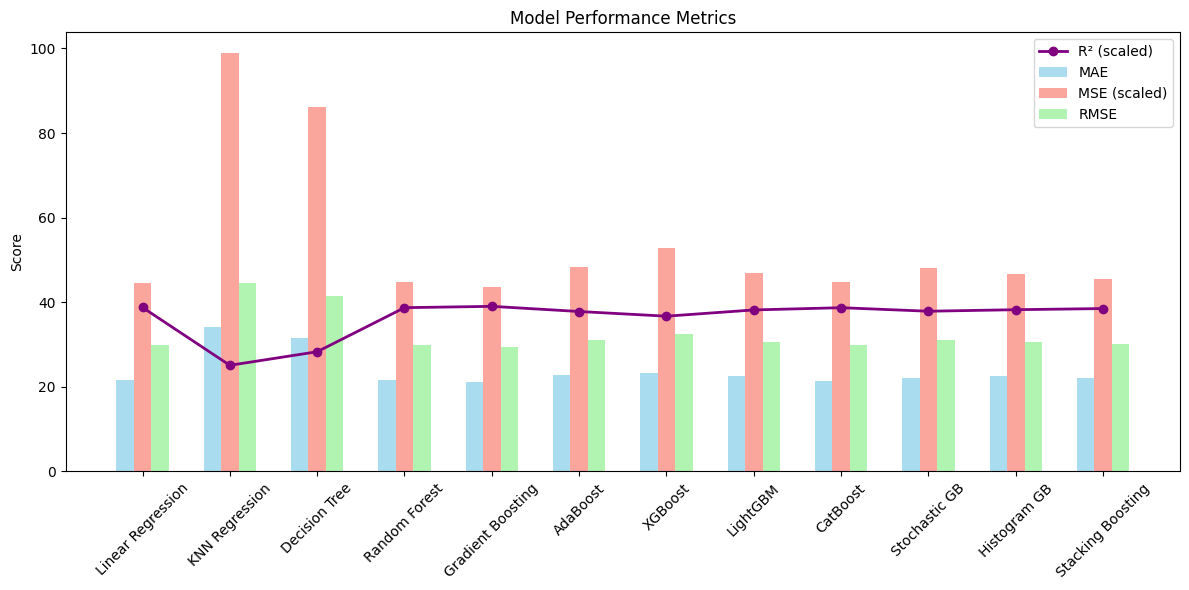

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Combine results for the new models
models = [
    'Linear Regression', 'KNN Regression', 'Decision Tree', 'Random Forest',
    'Gradient Boosting', 'AdaBoost', 'XGBoost', 'LightGBM', 'CatBoost',
    'Stochastic GB', 'Histogram GB', 'Stacking Boosting'
]

# These values should be replaced with the actual computed metrics for each model
mae = [mae_lr, mae_knn, mae_dt, mae_rf, mae_gb, mae_ada, mae_xgb, mae_lgb, mae_catboost, mae_sgb, mae_hgb, mae_stacking]
mse = [mse_lr, mse_knn, mse_dt, mse_rf, mse_gb, mse_ada, mse_xgb, mse_lgb, mse_catboost, mse_sgb, mse_hgb, mse_stacking]
rmse = [rmse_lr, rmse_knn, rmse_dt, rmse_rf, rmse_gb, rmse_ada, rmse_xgb, rmse_lgb, rmse_catboost, rmse_sgb, rmse_hgb, rmse_stacking]
r2 = [r2_lr, r2_knn, r2_dt, r2_rf, r2_gb, r2_ada, r2_xgb, r2_lgb, r2_catboost, r2_sgb, r2_hgb, r2_stacking]

# Scaling MSE and R² values to fit into the same plot as the other metrics
mse_scaled = [m * 0.05 for m in mse]  # Adjust the scaling factor as needed
r2_scaled = [r * 50 for r in r2]      # Adjust the scaling factor as needed

# Plot
plt.figure(figsize=(12, 6))
x = np.arange(len(models))

# Plot the bar charts for MAE, MSE (scaled), and RMSE
plt.bar(x - 0.2, mae, width=0.2, label='MAE', color='skyblue', alpha=0.7)
plt.bar(x, mse_scaled, width=0.2, label='MSE (scaled)', color='salmon', alpha=0.7)
plt.bar(x + 0.2, rmse, width=0.2, label='RMSE', color='lightgreen', alpha=0.7)

# Plot the R² values as a line (scaled)
plt.plot(x, r2_scaled, label='R² (scaled)', color='purple', marker='o', linewidth=2)

# Set the labels and title
plt.xticks(x, models, rotation=45)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Gradient Boosting Is the BEST - learning curve


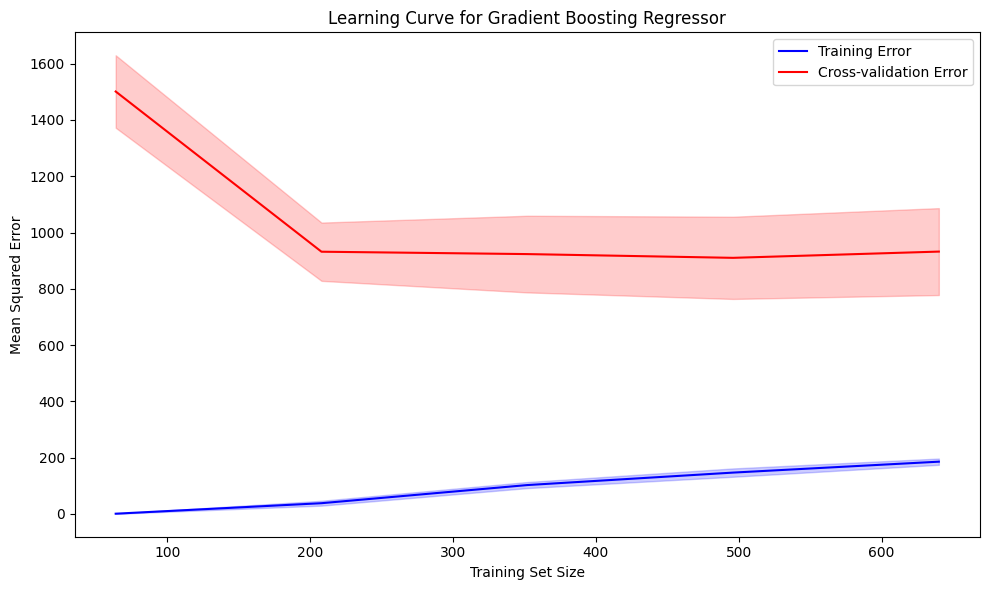

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    gb, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Convert negative MSE values to positive
train_scores = -train_scores
test_scores = -test_scores

# Calculate mean and standard deviation of train and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation Error', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

# Title and labels
plt.title('Learning Curve for Gradient Boosting Regressor')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


Prediction VS Actual - BEST


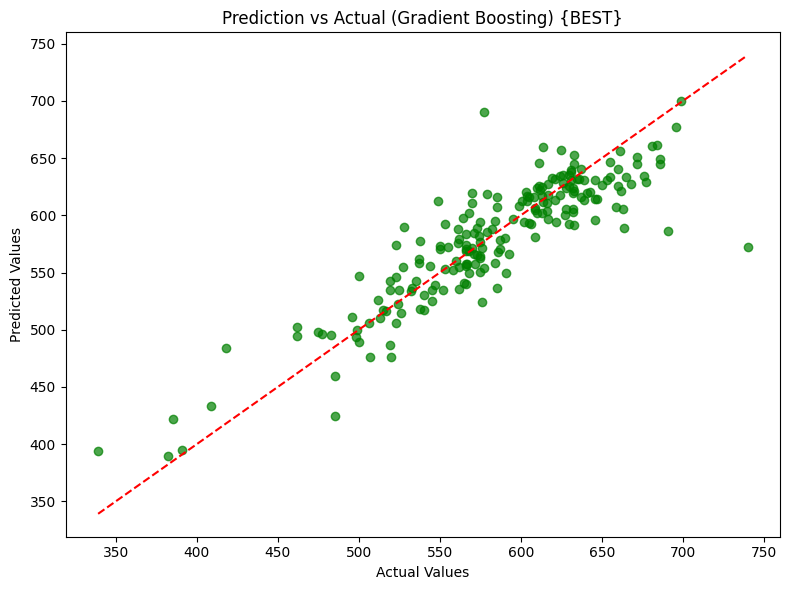

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Prediction vs Actual (Gradient Boosting) {BEST}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()


Prediction vs Actual Worst

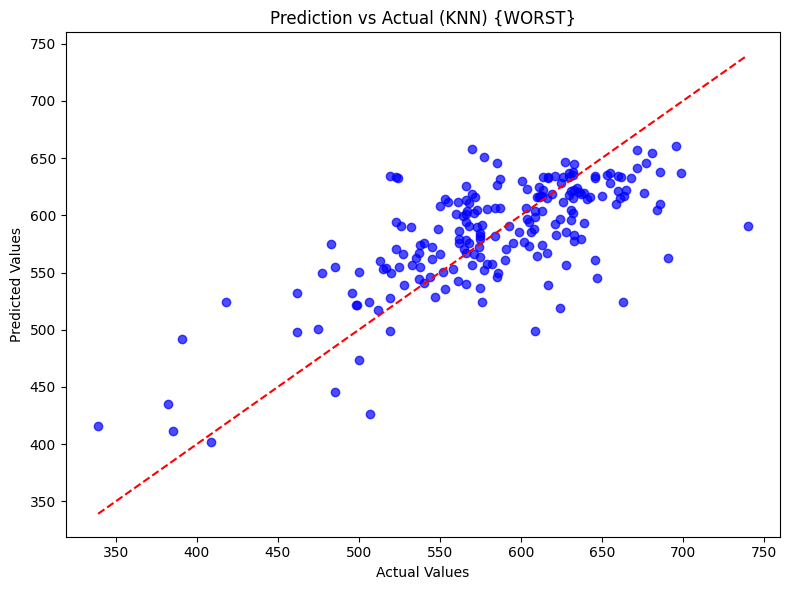

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Prediction vs Actual (KNN) {WORST}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()
